In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image  # Import image preprocessing utilities
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm
import numpy as np 
import pickle as pkl

In [7]:
filenames=[]
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))

In [8]:
len(filenames)

1940

In [9]:

model =ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))
model.trainable=False

model= tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                  ])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_2               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
# Chargement de l'image et prétraitement
img = image.load_img('./images/28ZFBLD24         00100F_33972.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)

# Réinitialisation du modèle ou redéfinition avec la bonne forme d'entrée
model = tf.keras.models.Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    GlobalMaxPool2D()
])

# Prédiction avec le modèle
result = model.predict(img_preprocess).flatten()

# Normalisation des résultats
norm_result = result / norm(result)

# Affichage des résultats normalisés
print(norm_result)
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()  
    norm_result=result/norm(result)
    return norm_result
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[0.0076957  0.04306083 0.0125016  ... 0.01141719 0.01138865 0.03110745]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


array([0.00943984, 0.05188847, 0.00508995, ..., 0.01468015, 0.0046517 ,
       0.00880377], dtype=float32)

In [11]:
image_features=[]
for file in filenames[0:1940]:
    image_features.append(extract_features_from_images(file,model))
image_features  
Image_features= pkl.dump(image_features,open('Images_features.pkl','wb'))
filenames= pkl.dump(filenames,open('filenames.pkl','wb'))
Image_features= pkl.load(open('Images_features.pkl','rb'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
filenames= pkl.load(open('filenames.pkl','rb'))
np.array(Image_features).shape

(1940, 2048)

In [24]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [25]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [26]:
input_image= extract_features_from_images('./images/28ZFBLD24         00100F_33972.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [27]:
distance, indices = neighbors.kneighbors([input_image], n_neighbors=5)  # Set n_neighbors to 5

In [28]:
indices[0]

array([ 23,  25,  28,  27, 153], dtype=int64)

In [29]:
from IPython.display import Image

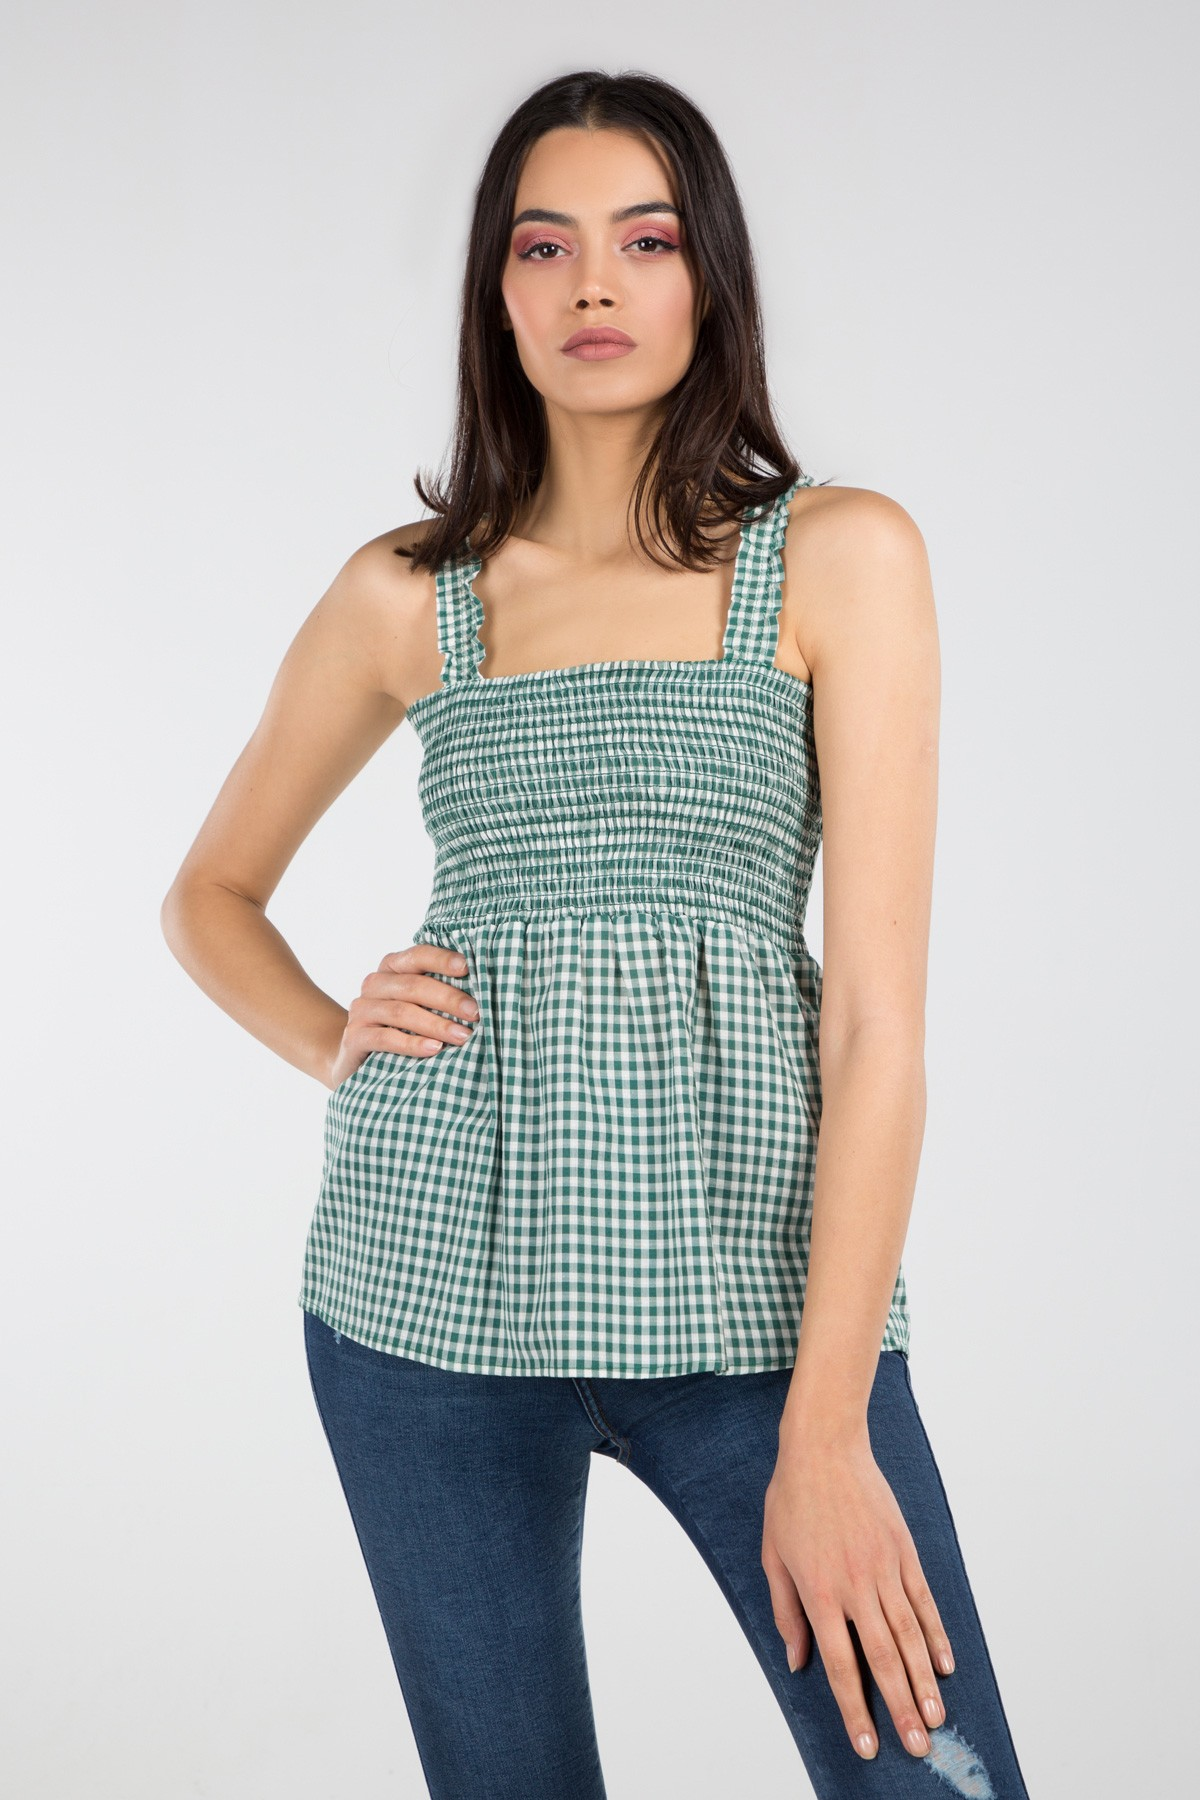

In [30]:
Image('./images/28ZFBLD24         00100F_33972.jpg')

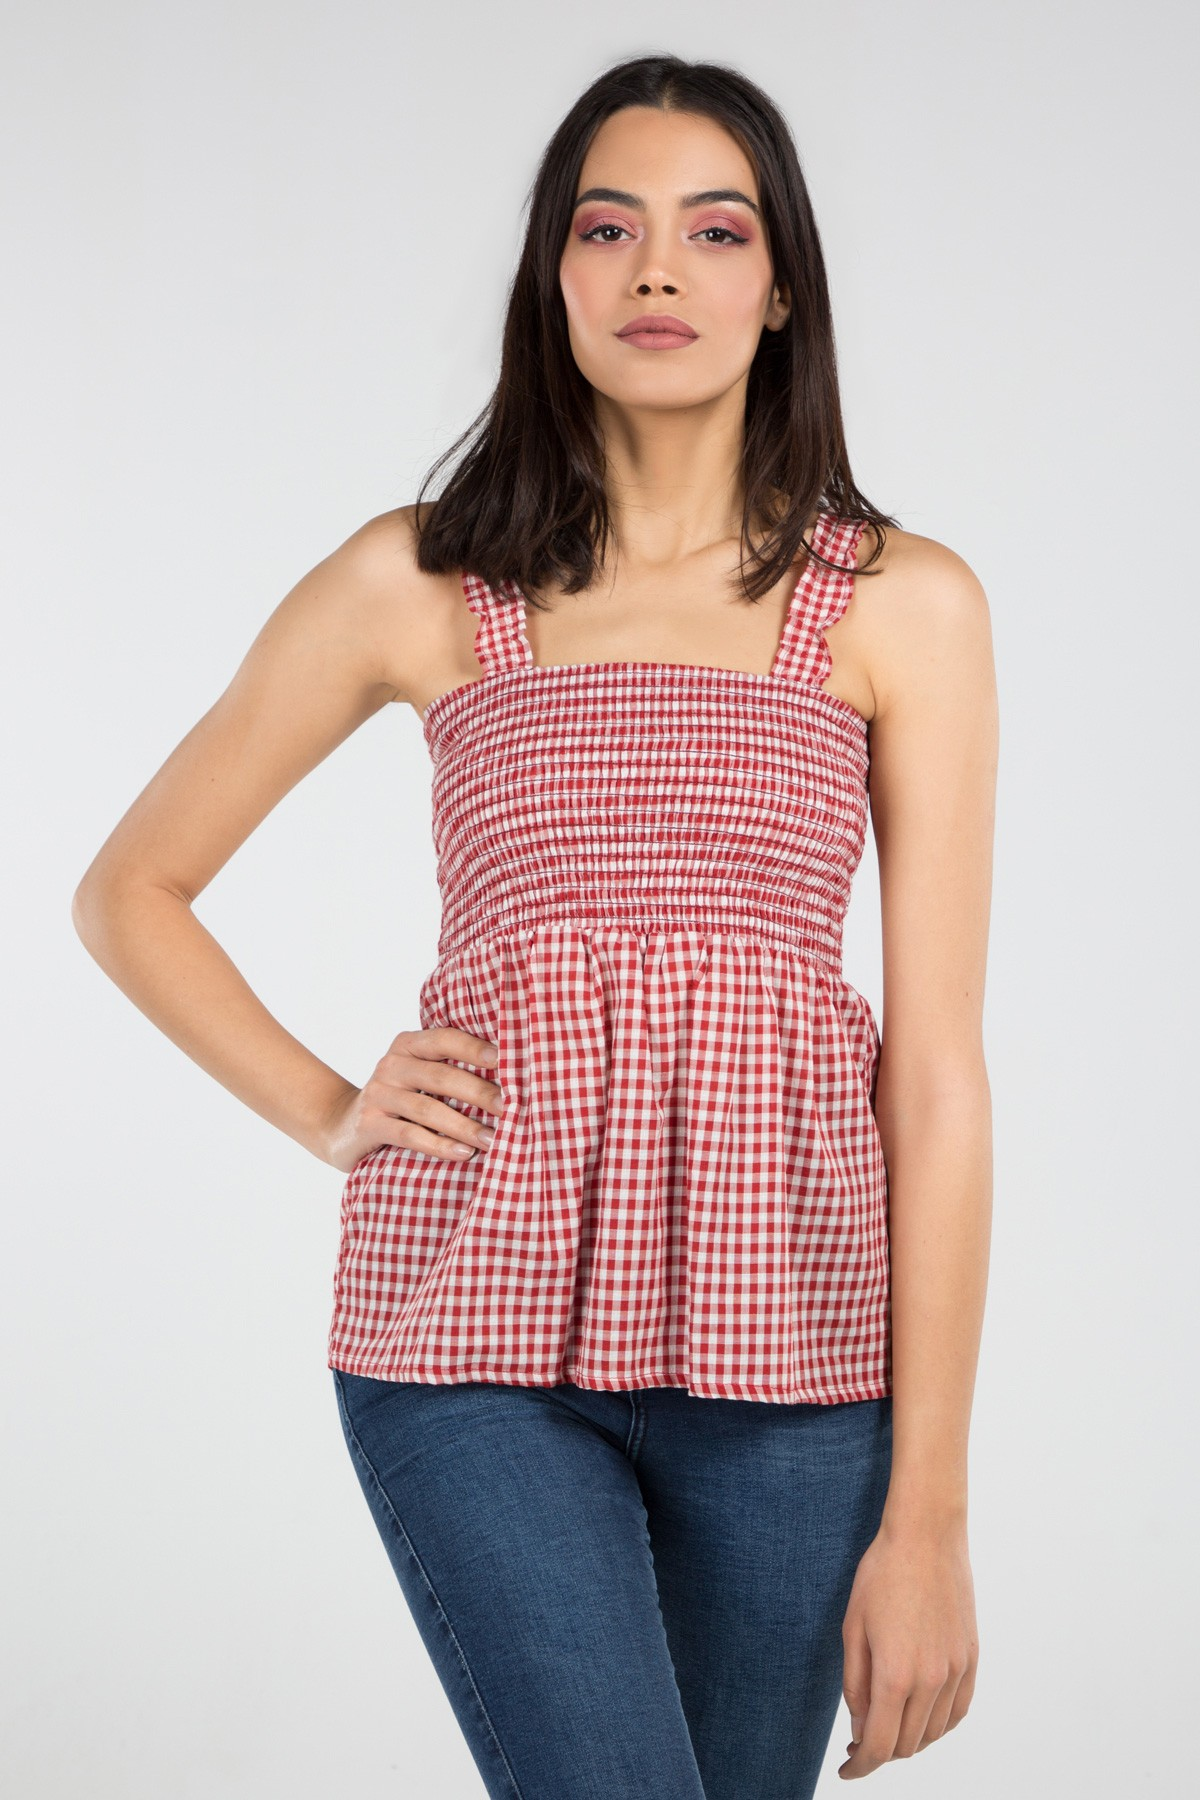

In [31]:
Image(filenames[indices[0][1]])

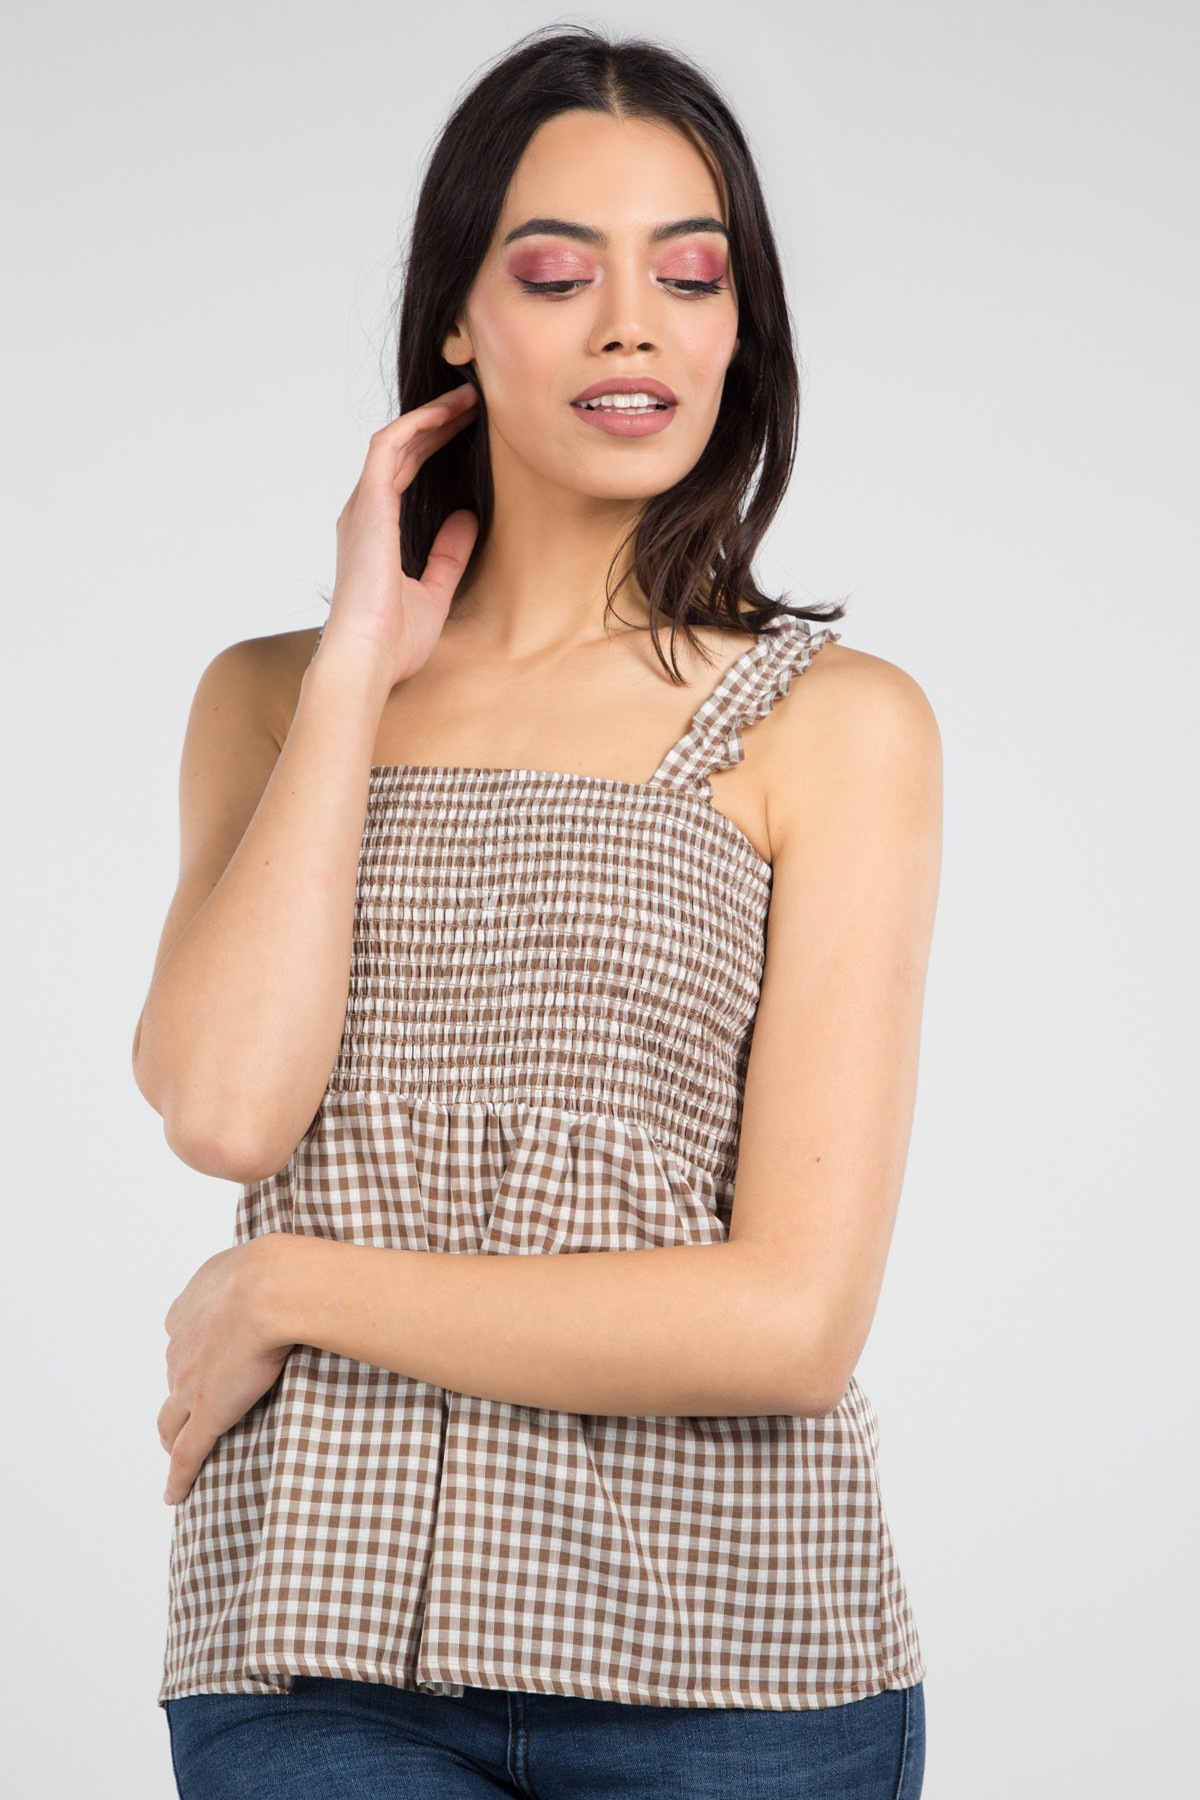

In [32]:
Image(filenames[indices[0][2]])

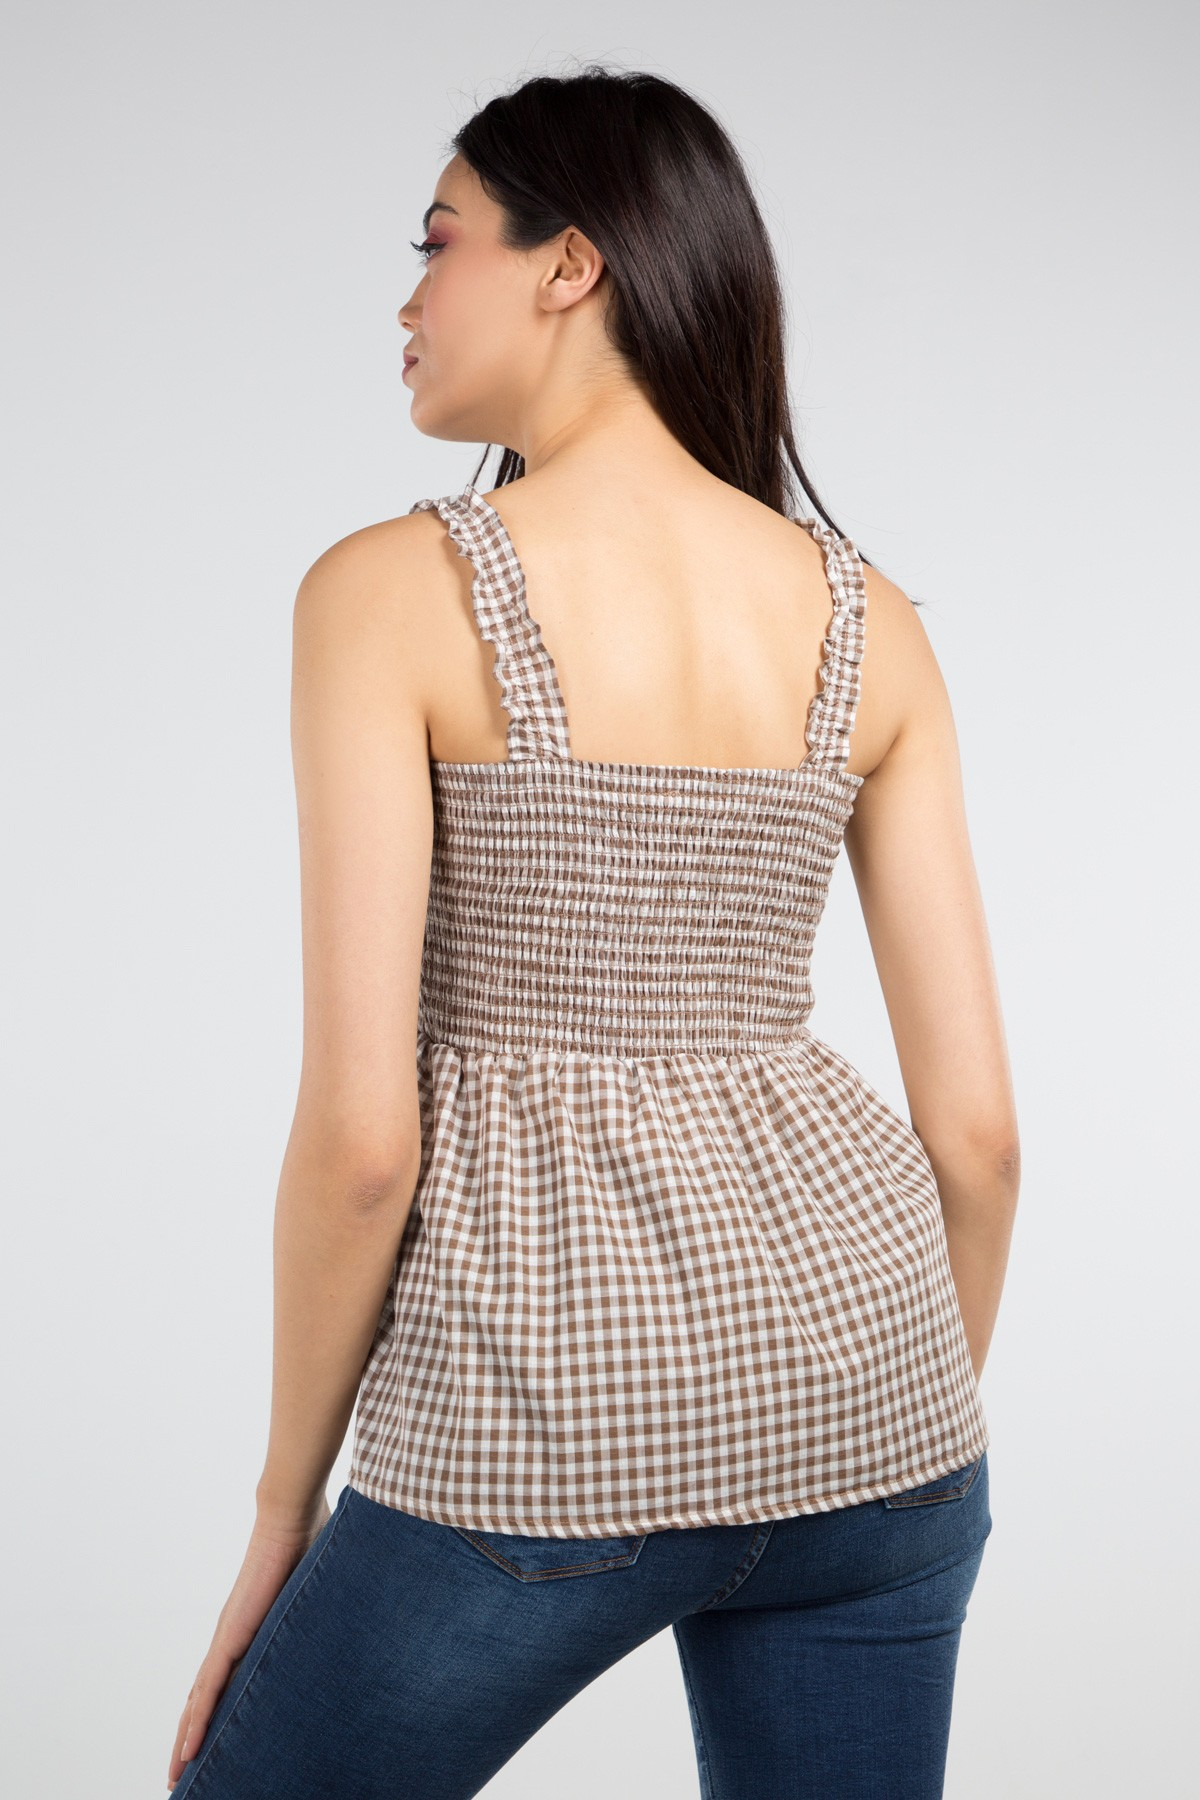

In [33]:
Image(filenames[indices[0][3]])

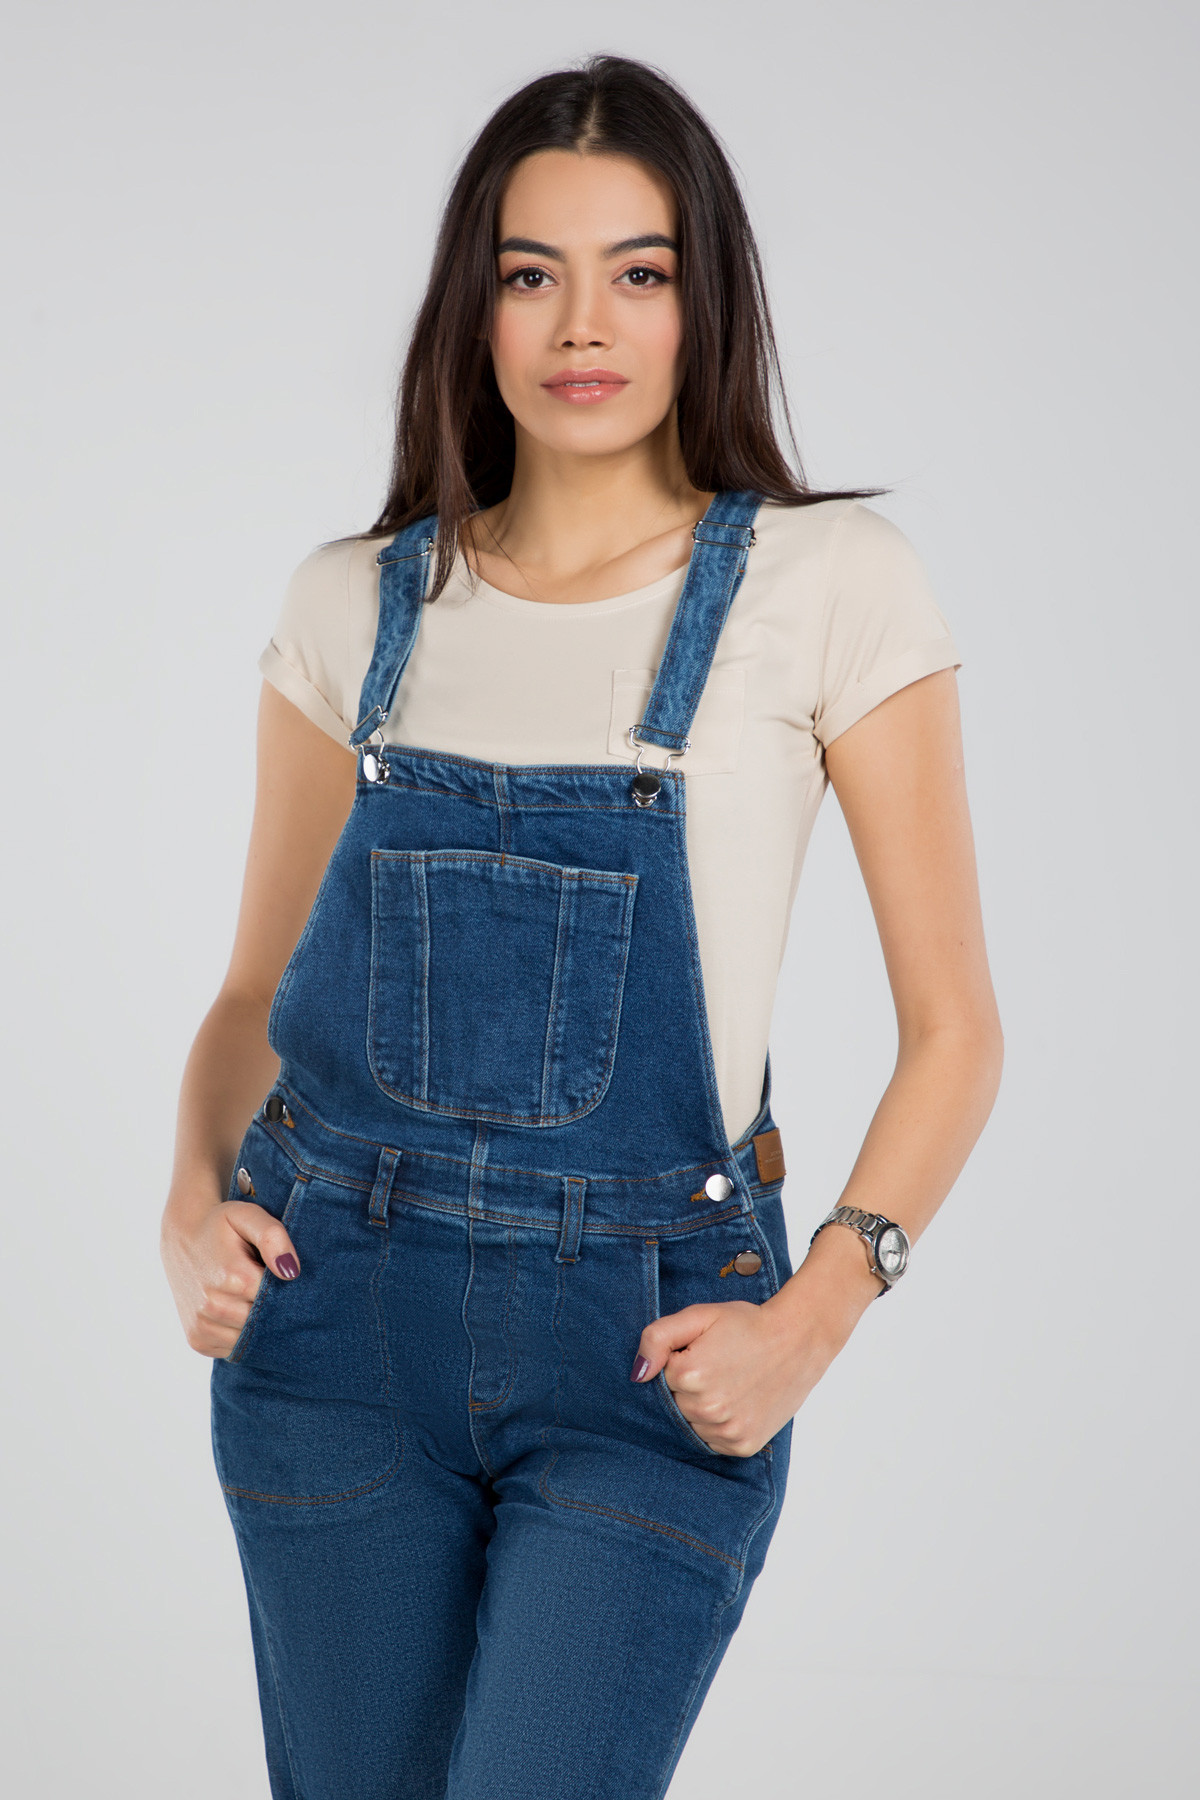

In [34]:
Image(filenames[indices[0][4]])